# Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML
researchers to this date. The "goal" field refers to the presence of heart disease in the patient. 
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply
attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)-Target

So here we will use classification technique to presence of Heart Disease.

# 1-Data Exploration

In [2]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#lets import the Herat data and print them
heartdata_init=pd.read_csv('heartdata.csv')
print(heartdata_init.shape)

print(heartdata_init.head(10))

(303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0

In [4]:
#checking the information of the data and is there any null values present
heartdata_init.info()

#so by looking the information, here there are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [5]:
#lets again see the data
heartdata_init.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


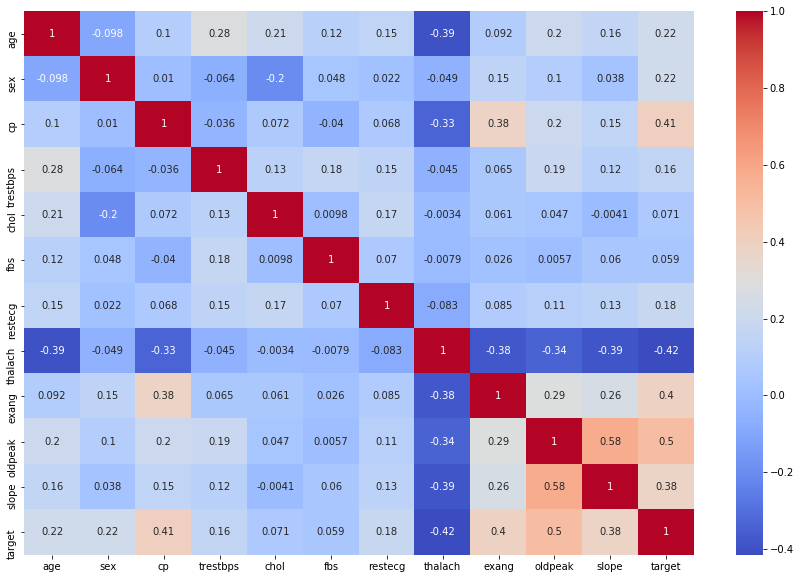

In [6]:
#lets see the corelation among data wrt target
plt.figure(figsize=(15,10))
sns.heatmap(heartdata_init.corr(),cmap='coolwarm',annot=True)

#so by looking this, all most every attribute has almost equal corealtion with the target varibale, 
#so we can't drop any column

In [7]:
#lets print all the columns with their datatype
heartdata_init.dtypes

#so here ca and thal both are object data type, so we will convert them to numeric.

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [8]:
#lets find what are the types of records are there in target attribute
print(np.unique(heartdata_init['target'], return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int64), array([164,  55,  36,  35,  13], dtype=int64))


In [9]:
#so here the target attribute has 5 values, so for model building we will convert it to 1 and 0.
#so lets map those values
heartdata_init['target'] = heartdata_init.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

#again lets find what are the types of records are there in target attribute after mapping has been done
print(np.unique(heartdata_init['target'], return_counts=True))

#counting the target varibales
print(heartdata_init.target.value_counts())

(array([0, 1], dtype=int64), array([164, 139], dtype=int64))
0    164
1    139
Name: target, dtype: int64


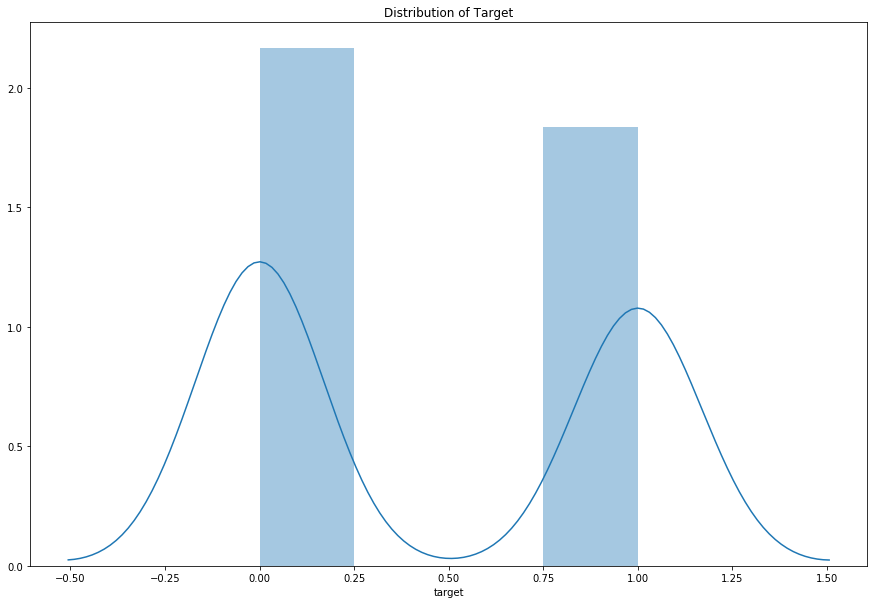

In [10]:
# now lets see the distribution of "target"
plt.figure(figsize=(15,10))
plt.title('Distribution of Target')
sns.distplot(heartdata_init['target'])

Text(0.5, 1.0, 'Target Vs Age')

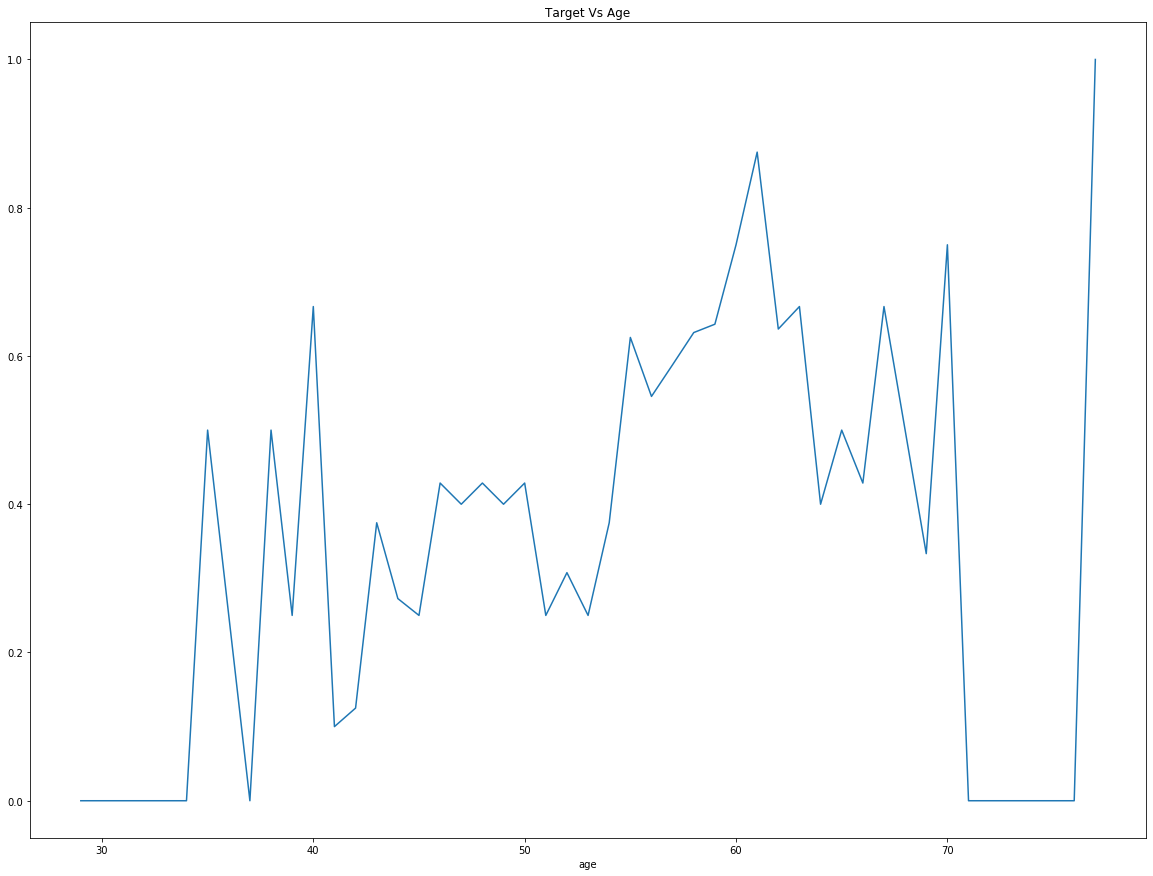

In [11]:
# now lets see the distribution of "Target" changes wrt Age
byAge=heartdata_init.groupby('age').mean()
plt.figure(figsize=(20,15))
byAge['target'].plot()
plt.title('Target Vs Age')

#so by looking this plot we can say that, as the age increases the possibilty of Heart diesease increases.

In [12]:
#lets find what are the types of records are there in ca attribute
print(np.unique(heartdata_init['ca'], return_counts=True))

(array(['0.0', '1.0', '2.0', '3.0', '?'], dtype=object), array([176,  65,  38,  20,   4], dtype=int64))


In [13]:
#so as only 4 records are having missing values are marked with '?' mark, 
#so we can replace with 0.0 values, as this is the most no. of datas present in the dataset
#but before that, lets convert it to NaN.
heartdata_init= heartdata_init.replace({'?':np.NaN})
print(heartdata_init.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [14]:
# lets replace these value with '0.0'
heartdata_init['ca'] = heartdata_init['ca'].replace(np.NaN,'0.0')
print(heartdata_init['ca'].value_counts())
print(np.unique(heartdata_init['ca'], return_counts=True))

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
(array(['0.0', '1.0', '2.0', '3.0'], dtype=object), array([180,  65,  38,  20], dtype=int64))


In [15]:
# Now lets go for ca value to encode using one hot encoding technique.
from sklearn.preprocessing import OneHotEncoder
ca=pd.get_dummies(heartdata_init['ca'],prefix='ca')
print(ca.head())
print(ca.shape)

   ca_0.0  ca_1.0  ca_2.0  ca_3.0
0       1       0       0       0
1       0       0       0       1
2       0       0       1       0
3       1       0       0       0
4       1       0       0       0
(303, 4)


In [16]:
#lets find what are the types of records are there in thal attribute
print(heartdata_init['thal'].value_counts())


3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64


In [17]:
#similarly lets go for thal value to encode using one hot encoding technique.
from sklearn.preprocessing import OneHotEncoder
thal=pd.get_dummies(heartdata_init['thal'],prefix='thal')
print(thal.head())
print(thal.shape)

   thal_3.0  thal_6.0  thal_7.0
0         0         1         0
1         1         0         0
2         0         0         1
3         1         0         0
4         1         0         0
(303, 3)


In [18]:
#lets combine all the datas
combine=[heartdata_init,ca,thal]
heartdata=pd.concat(combine,axis=1)
print(heartdata.head())
print(heartdata.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   ...   ca thal target  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  thal_6.0  \
0  ...  0.0  6.0      0       1       0       0       0         0         1   
1  ...  3.0  3.0      1       0       0       0       1         1         0   
2  ...  2.0  7.0      1       0       0       1       0         0         0   
3  ...  0.0  3.0      0       1       0       0       0         1         0   
4  ...  0.0  3.0      0       1       0       0       0         1         0   

   thal_7.0  
0         0  
1         0  
2         1  
3     

In [19]:
#now lets drop ca nad thal attribute from the dataset, as we have converted them to numerical value
heartdata=heartdata.drop(columns=['ca','thal'])
print(heartdata.head())
print(heartdata.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope  target  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0    3.0       0       1       0       0       0         0         1         0  
1    2.0       1       0       0       0       1         1         0         0  
2    2.0       1       0       0       1       0         0         0         1  
3    3.0       0       1       0       0       0         1         0         0  
4    1.0       0       1       0       0       0         1         0         0  
(303, 19)


In [20]:
#lets separating the input and output/target variables
x=heartdata.drop(columns=['target'])
y=heartdata[['target']]

print(x.shape)
print(y.shape)

(303, 18)
(303, 1)


# 3-Building Different Model and Finding the Best Model

In [21]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(303, 18)
(303, 1)


In [22]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(242, 18) (61, 18)
(242, 1) (61, 1)


In [23]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [24]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [25]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.8688524590163934


Cross Value Score: 0.8448387096774193


roc_auc_score: 0.8706709956709956


Classification Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Confusion Matrix:
 [[28  5]
 [ 3 25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC **********************


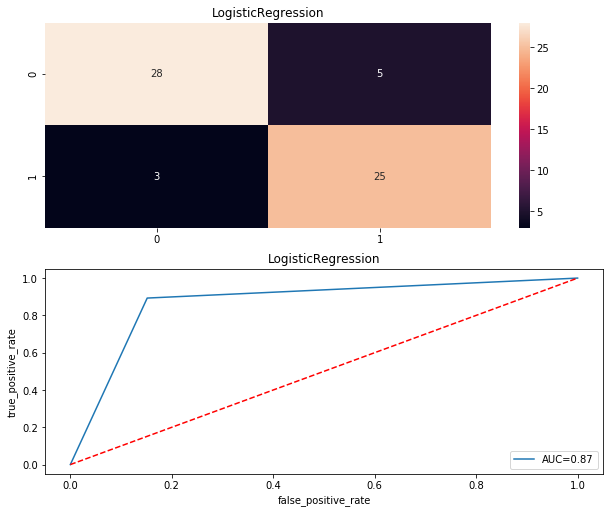

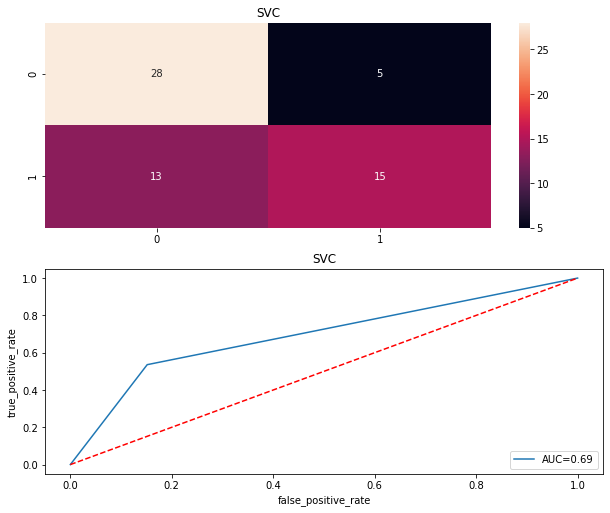

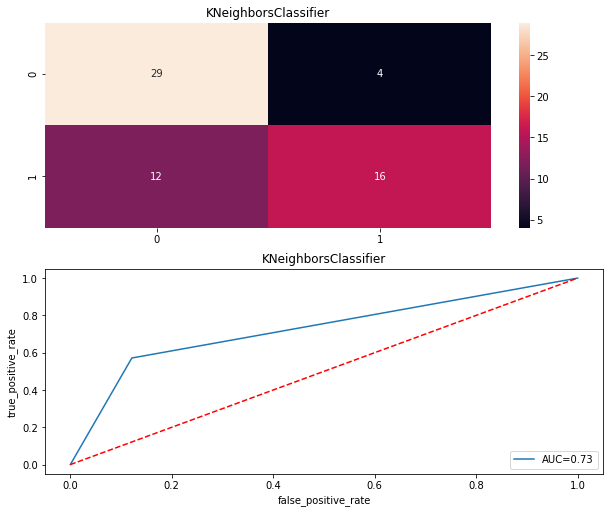

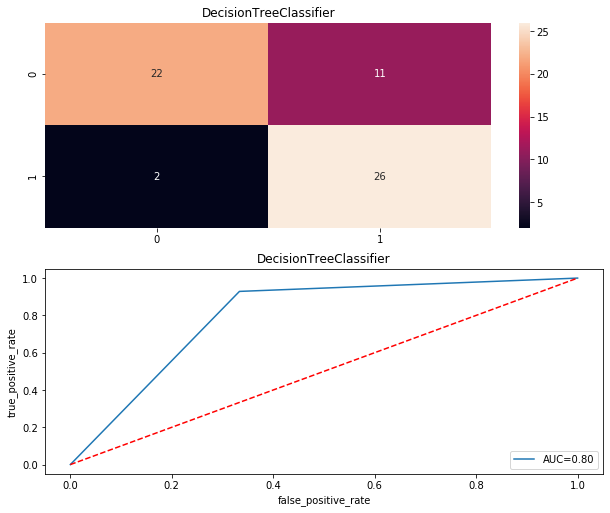

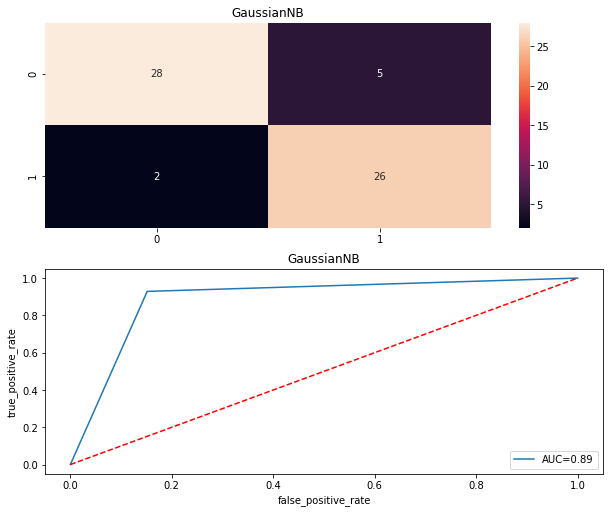

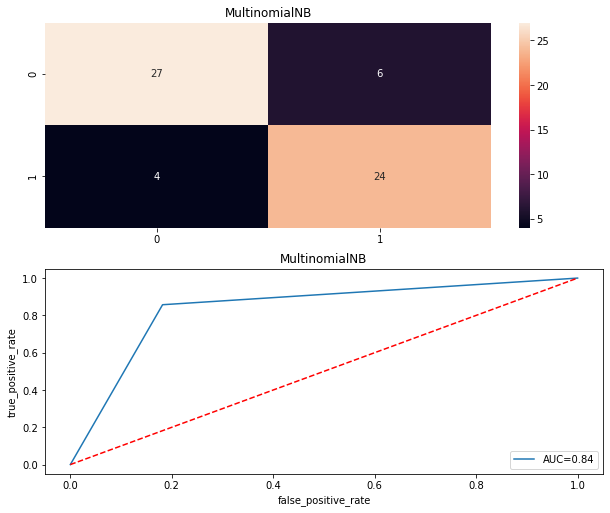

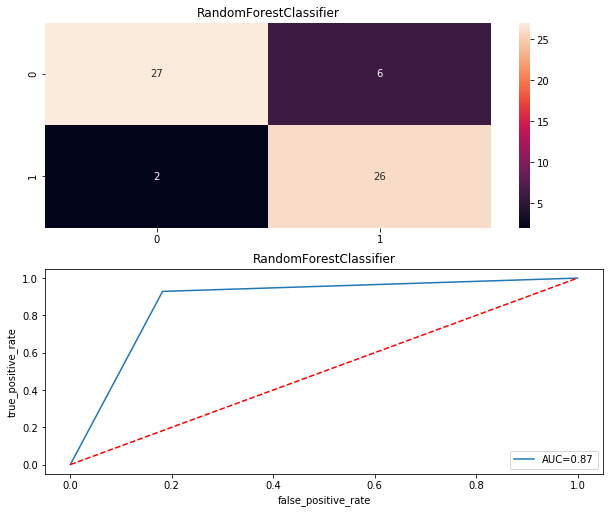

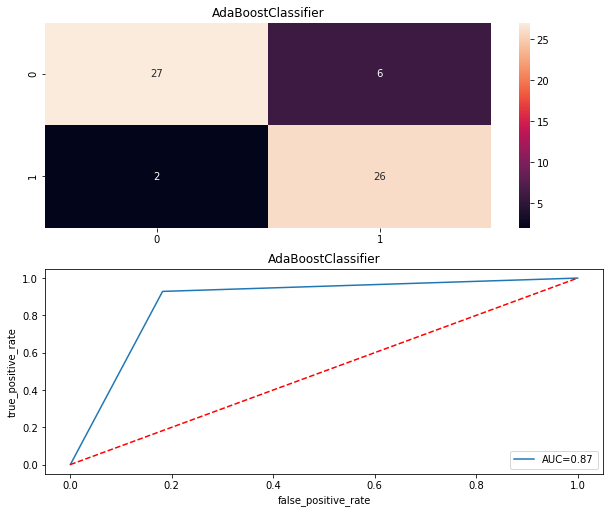

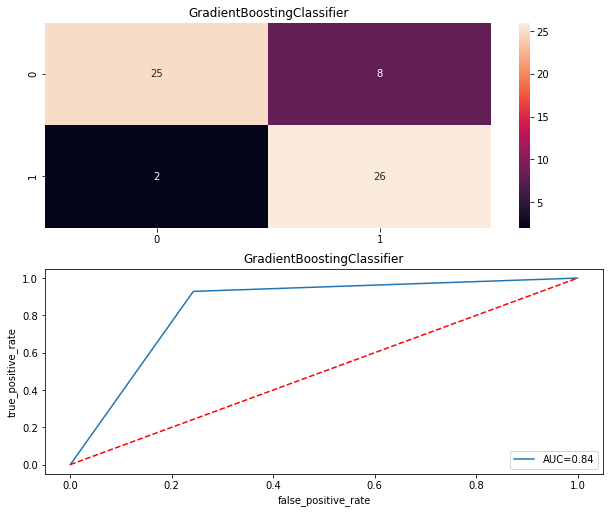

In [26]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [27]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score  \
0          LogisticRegression       86.885246          84.483871   
1                         SVC       70.491803          65.365591   
2        KNeighborsClassifier       73.770492          64.354839   
3      DecisionTreeClassifier       78.688525          74.494624   
4                  GaussianNB       88.524590          81.817204   
5               MultinomialNB       83.606557          77.559140   
6      RandomForestClassifier       86.885246          84.107527   
7          AdaBoostClassifier       86.885246          81.795699   
8  GradientBoostingClassifier       83.606557          83.118280   

   Roc_Auc_Curve  
0      87.067100  
1      69.209957  
2      72.510823  
3      79.761905  
4      88.852814  
5      83.766234  
6      87.337662  
7      87.337662  
8      84.307359  


Accuracy Score is: 0.8852459016393442
Cross Value Score: 0.8181720430107526
ROC_AUC Score: 0.8885281385281386
Confusion Matix:
 [[28  5]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

AxesSubplot(0.125,0.808774;0.62x0.0712264)


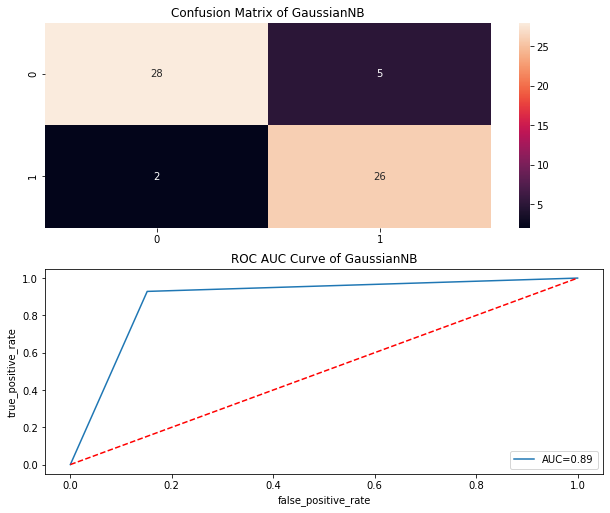

In [28]:
# So here GaussianNB is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_gnb))
print('Cross Value Score:', cross_val_score(gnb, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_gnb)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_gnb))
print('Classification Report:\n', classification_report(y_test,pred_gnb))

#lets print the confusion matrix and roc auc curve
cm=confusion_matrix(y_test,pred_gnb)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of GaussianNB')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)

roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of GaussianNB')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right') 



In [29]:
#lets predict the presence of Heart Disease
print('Actual presence of Heart Disease:\n',y_test)
print('Predicted presence of Heart Disease:\n',pred_gnb)

Actual presence of Heart Disease:
      target
219       0
271       0
89        0
101       0
67        0
..      ...
285       1
243       1
94        0
291       0
155       1

[61 rows x 1 columns]
Predicted presence of Heart Disease:
 [0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1]


In [30]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gnb,'gnb_Heart_Disease.obj')

['gnb_Heart_Disease.obj']

In [33]:
# load the model from the file
Heart_Disease_from_joblib=joblib.load('gnb_Heart_Disease.obj')

In [34]:
#Use the loaded model to make predictions against test data
Heart_Disease_from_joblib.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

# Conclusion:
    
So here 'GaussianNB Model' is the best model out of all model tested above and by looking this we can conclude that
our model is predicting around 89% of correct results for predicting the presence of Heart Disease.